In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

$dX_t = -X_t dt + dB_t$

$dW_t = \alpha_t dX_t = \alpha_t(-X_t dt + dB_t)$

$\alpha_t ^ * = -W_t X_t D(\tau)$

$J(W, X, t) = \frac{1}{\gamma} W^\gamma \sqrt{e^\tau C(\tau)^{\gamma-1}} \exp\left( \frac{X^2}{2} [1 + (\gamma-1)D(\tau)] \right)$

In [3]:
k = 2.0
sigma = 1.0
gamma = -2.0
T = 1.0

$\tau = T - t$

$\nu = \frac{1}{\sqrt{1-\gamma}}$

In [4]:
def nu_fun(gamma):
    """Calculates nu based on risk aversion gamma."""
    if gamma == 1: return np.inf
    return 1.0 / np.sqrt(1.0 - gamma)

$C(\tau) = \cosh(\nu\tau) + \nu \sinh(\nu\tau)$

In [5]:
def C(tau, nu):
    """Helper function C(tau) from Eq 14."""
    # Using normalized time (nu * tau)
    return np.cosh(nu * tau) + nu * np.sinh(nu * tau)

$C'(\tau) = \frac{dC(\tau)}{d\tau} = \nu \sinh \nu \tau + \nu^2 \cosh \nu \tau$

In [6]:
def C_(tau, nu):
    """Derivative C'(tau) from Eq 13."""
    return nu * np.sinh(nu * tau) + (nu**2) * np.cosh(nu * tau)

$D(\tau) = \frac{C'(\tau)}{C(\tau)}$

In [7]:
def D(tau, gamma):
    """
    Calculates the position sizing factor D(tau).
    Normalized time input expected.
    """
    if gamma == 0:
        return 1.0 # Log utility D(tau) case - 1
    
    nu = nu_fun(gamma)
    c = C(tau, nu)
    Cp = C_(tau, nu)
    return Cp / c

$\alpha_t^* = -W_t X_t D(\tau)$

In [8]:
def alpha(W, X, tau, k):
    tau_norm = tau / k
    D_val = D(tau_norm, gamma)
    # Scaling factor: k / sigma^2 (Derived from normalization section)
    scaling = k / (sigma ** 2)
    return -1 * W * X * scaling * D_val

$U(W_t)=\frac{1}{\gamma} W_t^\gamma$

In [9]:
def utility(W, gamma):
    if gamma == 0:
        return np.log(W)
    return (1 / gamma) * (W ** gamma)

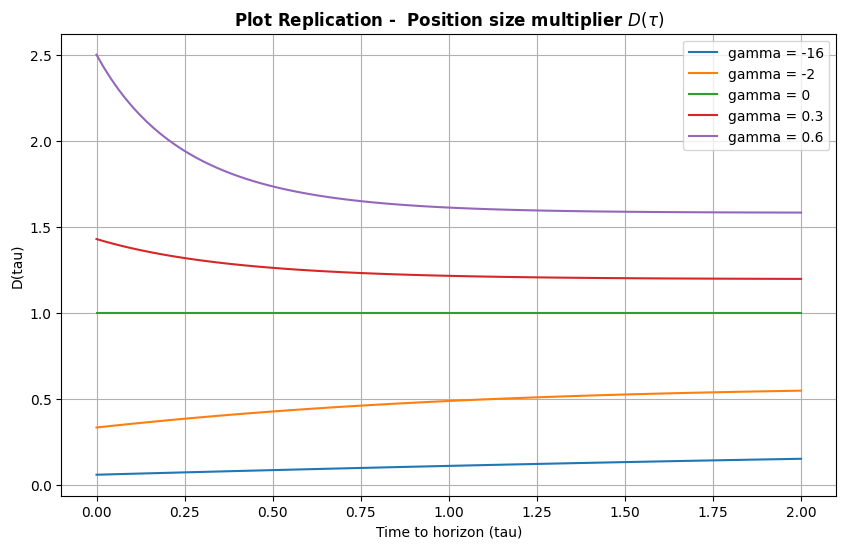

In [10]:
taus = np.linspace(0, 2.0, 100)
gammas = [-16, -2, 0, 0.3, 0.6]

plt.figure(figsize = (10, 6))

for g in gammas:
    d_values = [D(t, g) for t in taus]
    plt.plot(taus, d_values, label = f'gamma = {g}')
    
plt.title('Plot Replication -  Position size multiplier $D(\\tau)$', fontweight = 'bold')
plt.xlabel('Time to horizon (tau)')
plt.ylabel('D(tau)')
plt.legend()
plt.grid(True)
plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\g'
<>:15: SyntaxWarning: invalid escape sequence '\g'
/var/folders/ld/dywjpymn2xqdrbtbvpvv9xhm0000gn/T/ipykernel_64488/3393586955.py:15: SyntaxWarning: invalid escape sequence '\g'
  label = f'$\gamma={g}$'


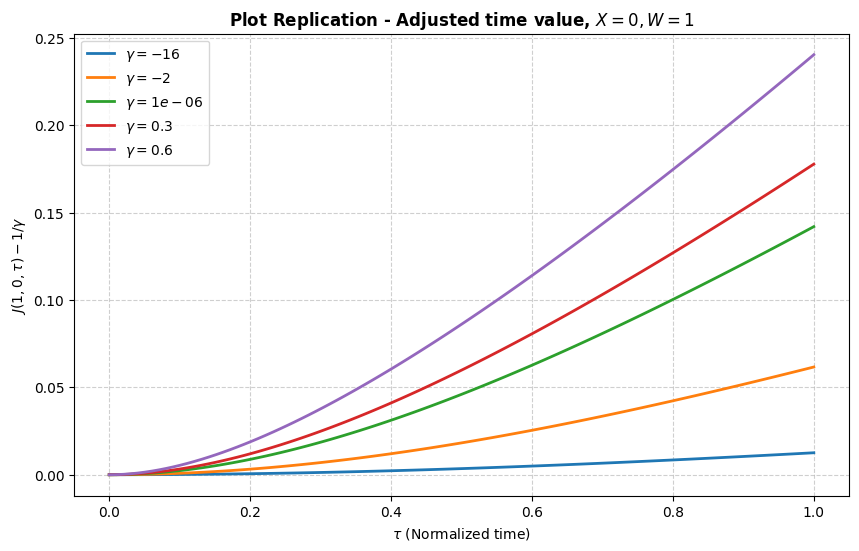

In [11]:
import numpy as np
import matplotlib.pyplot as plt

gammas = [-16, -2, 1e-6, 0.3, 0.6]
taus = np.linspace(0, 1, 100)
plt.figure(figsize = (10, 6))

for g in gammas:
    nu = nu_fun(g)
    c_val = C(taus, nu)
    term = np.exp(taus) * (c_val ** (g - 1))
    J = (1.0 / g) * np.sqrt(term)
    y = J - (1.0 / g)

    label = f'$\gamma={g}$'
        
    plt.plot(taus, y, label = label, linewidth = 2)

plt.title(r'Plot Replication - Adjusted time value, $X=0, W=1$', fontweight = 'bold')
plt.xlabel(r'$\tau$ (Normalized time)')
plt.ylabel(r'$J(1,0,\tau) - 1/\gamma$')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Monte-Carlo

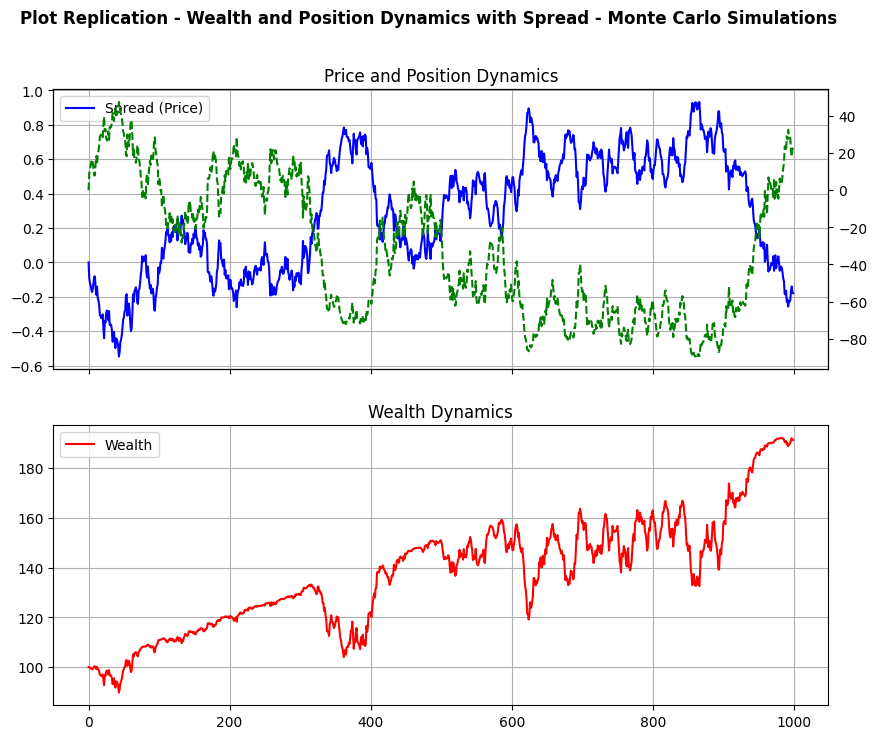

In [12]:
k = 2.0
sigma = 1.0
gamma = -2.0
T = 2.0
dt = 0.002
steps = int(T / dt)

X = 0.0
W = 100.0

time_points = np.linspace(0, T, steps)
X_path = []
alpha_path = []
W_path = []

# np.random.seed(42)

for t in time_points:
    tau = T - t
    if tau < 0: tau = 0
    a = alpha(W, X, tau, k)
    X_path.append(X)
    alpha_path.append(a)
    W_path.append(W)
    dW_t = np.random.normal(0, np.sqrt(dt))
    dX = -k * X * dt + sigma * dW_t
    dW_change = a * dX
    
    X += dX
    W += dW_change
    
    if W <= 0:
        W = 1e-6
        break

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 8), sharex = True)

fig.suptitle("Plot Replication - Wealth and Position Dynamics with Spread - Monte Carlo Simulations", fontweight = 'bold')

ax1.plot(X_path, label = 'Spread (Price)', color = 'blue')
ax12 = ax1.twinx()
ax12.plot(alpha_path, label = 'Position (Alpha)', color = 'green', linestyle = '--')
ax1.set_title('Price and Position Dynamics')
ax1.legend()
ax1.grid(True)

ax2.plot(W_path, label = 'Wealth', color = 'red')
ax2.set_title('Wealth Dynamics')
ax2.legend()
ax2.grid(True)

plt.show()